In [93]:
import numpy as np
from sklearn.model_selection import train_test_split
import itertools
from random import sample
import pickle
from scipy.spatial import distance
import time
import sys
from skmob.measures import evaluation
import math
from operator import itemgetter


import seaborn as sns
import networkx as nx

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [36.4, 15]
plt.rcParams["figure.autolayout"] = True


import random
random.seed(3110)

In [2]:
with open("../TaxiNYC/v_test.txt", "rb") as fp:   # Unpickling
            test_set = pickle.load(fp)
with open("../TaxiNYC/fake_set.txt", "rb") as fp:   # Unpickling
            fake_set = pickle.load(fp)
with open("../TaxiNYC/fake_set_gravity.txt", "rb") as fp:   # Unpickling
            fake_set_gravity = pickle.load(fp)  
with open("../TaxiNYC/fake_set_radiation.txt", "rb") as fp:   # Unpickling
            fake_set_radiation = pickle.load(fp)
with open("../TaxiNYC/fake_set_random.txt", "rb") as fp:   # Unpickling
            fake_set_random = pickle.load(fp)
with open("../TaxiNYC/fake_set_random_weighted.txt", "rb") as fp:   # Unpickling
            fake_set_random_weighted = pickle.load(fp)

In [3]:
somma = 0
i_test = 0
for i,t in enumerate(test_set):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_test = i
i_test

134

In [4]:
somma = 0
i_mogan = 0
for i,t in enumerate(fake_set):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_mogan = i
i_mogan

44

In [5]:
somma = 0
i_gravity = 0
for i,t in enumerate(fake_set_gravity):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_gravity = i
i_gravity

21

In [6]:
somma = 0
i_radiation = 0
for i,t in enumerate(fake_set_radiation):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_radiation = i
i_radiation

134

In [7]:
somma = 0
i_random = 0
for i,t in enumerate(fake_set_random):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_random = i
i_random

39

In [8]:
somma = 0
i_random_weighted = 0
for i,t in enumerate(fake_set_random_weighted):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_random_weighted = i
i_random_weighted

137

In [17]:
m0 = test_set[i_test]
m1 = fake_set[i_mogan]
m2 = fake_set_gravity[i_gravity]
m3 = fake_set_radiation[i_radiation]
m4 = fake_set_random[i_random]
m5 = fake_set_random_weighted[i_random_weighted]

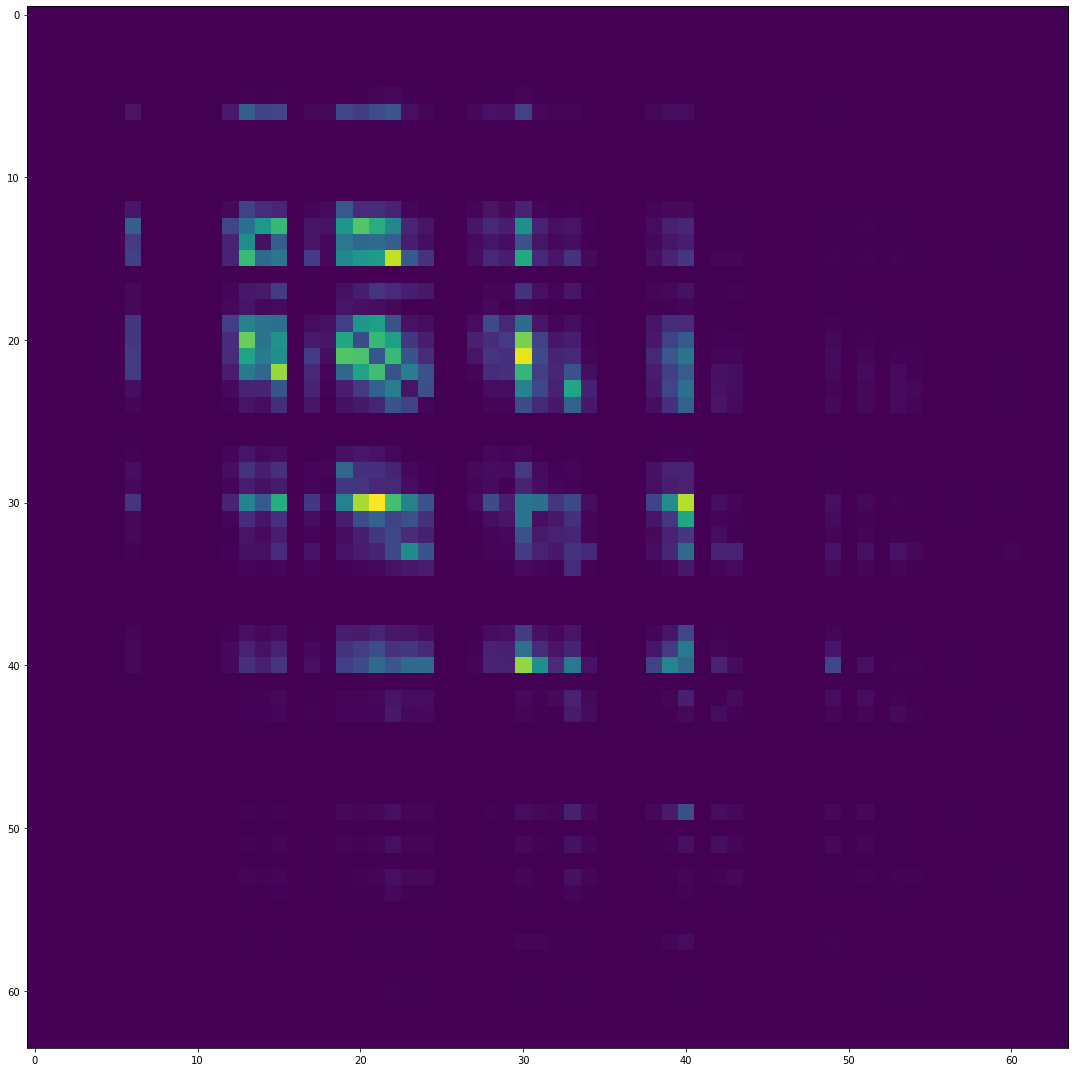

In [63]:
plt.imshow(m0)

In [53]:
print(np.max(m0))
a = np.argmax(m0)
a

2393


1941

In [54]:
row = math.floor(a/64)
row

30

In [55]:
col = a%64
col

21

In [56]:
m0[row,col]

2393

In [59]:
G0 = nx.from_numpy_matrix(m0, create_using=nx.DiGraph)

In [60]:
G0.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63))

In [ ]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

In [79]:
d = dict(G0.degree(weight='weight'))
d

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 372,
 6: 10044,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 6826,
 13: 28144,
 14: 17048,
 15: 29727,
 16: 0,
 17: 6260,
 18: 1991,
 19: 23882,
 20: 31225,
 21: 35415,
 22: 32965,
 23: 19444,
 24: 12014,
 25: 0,
 26: 0,
 27: 2247,
 28: 8397,
 29: 6278,
 30: 40821,
 31: 14253,
 32: 7470,
 33: 15198,
 34: 3222,
 35: 0,
 36: 0,
 37: 0,
 38: 6118,
 39: 14838,
 40: 27769,
 41: 0,
 42: 3148,
 43: 2385,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 3732,
 50: 0,
 51: 1940,
 52: 0,
 53: 1586,
 54: 735,
 55: 0,
 56: 0,
 57: 505,
 58: 0,
 59: 0,
 60: 356,
 61: 0,
 62: 17,
 63: 0}

In [83]:
node = max(d, key=d.get)
node

30

In [85]:
G1 = nx.from_numpy_matrix(m1, create_using=nx.DiGraph)
G2 = nx.from_numpy_matrix(m2, create_using=nx.DiGraph)
G3 = nx.from_numpy_matrix(m3, create_using=nx.DiGraph)
G4 = nx.from_numpy_matrix(m4, create_using=nx.DiGraph)
G5 = nx.from_numpy_matrix(m5, create_using=nx.DiGraph)

In [90]:
ego0 = nx.ego_graph(G0, 30, radius=1)
pos = nx.spring_layout(ego0, seed=3110)  # Seed layout for reproducibility
nx.draw(ego0, pos, node_color="b", node_size=1, with_labels=False)


30


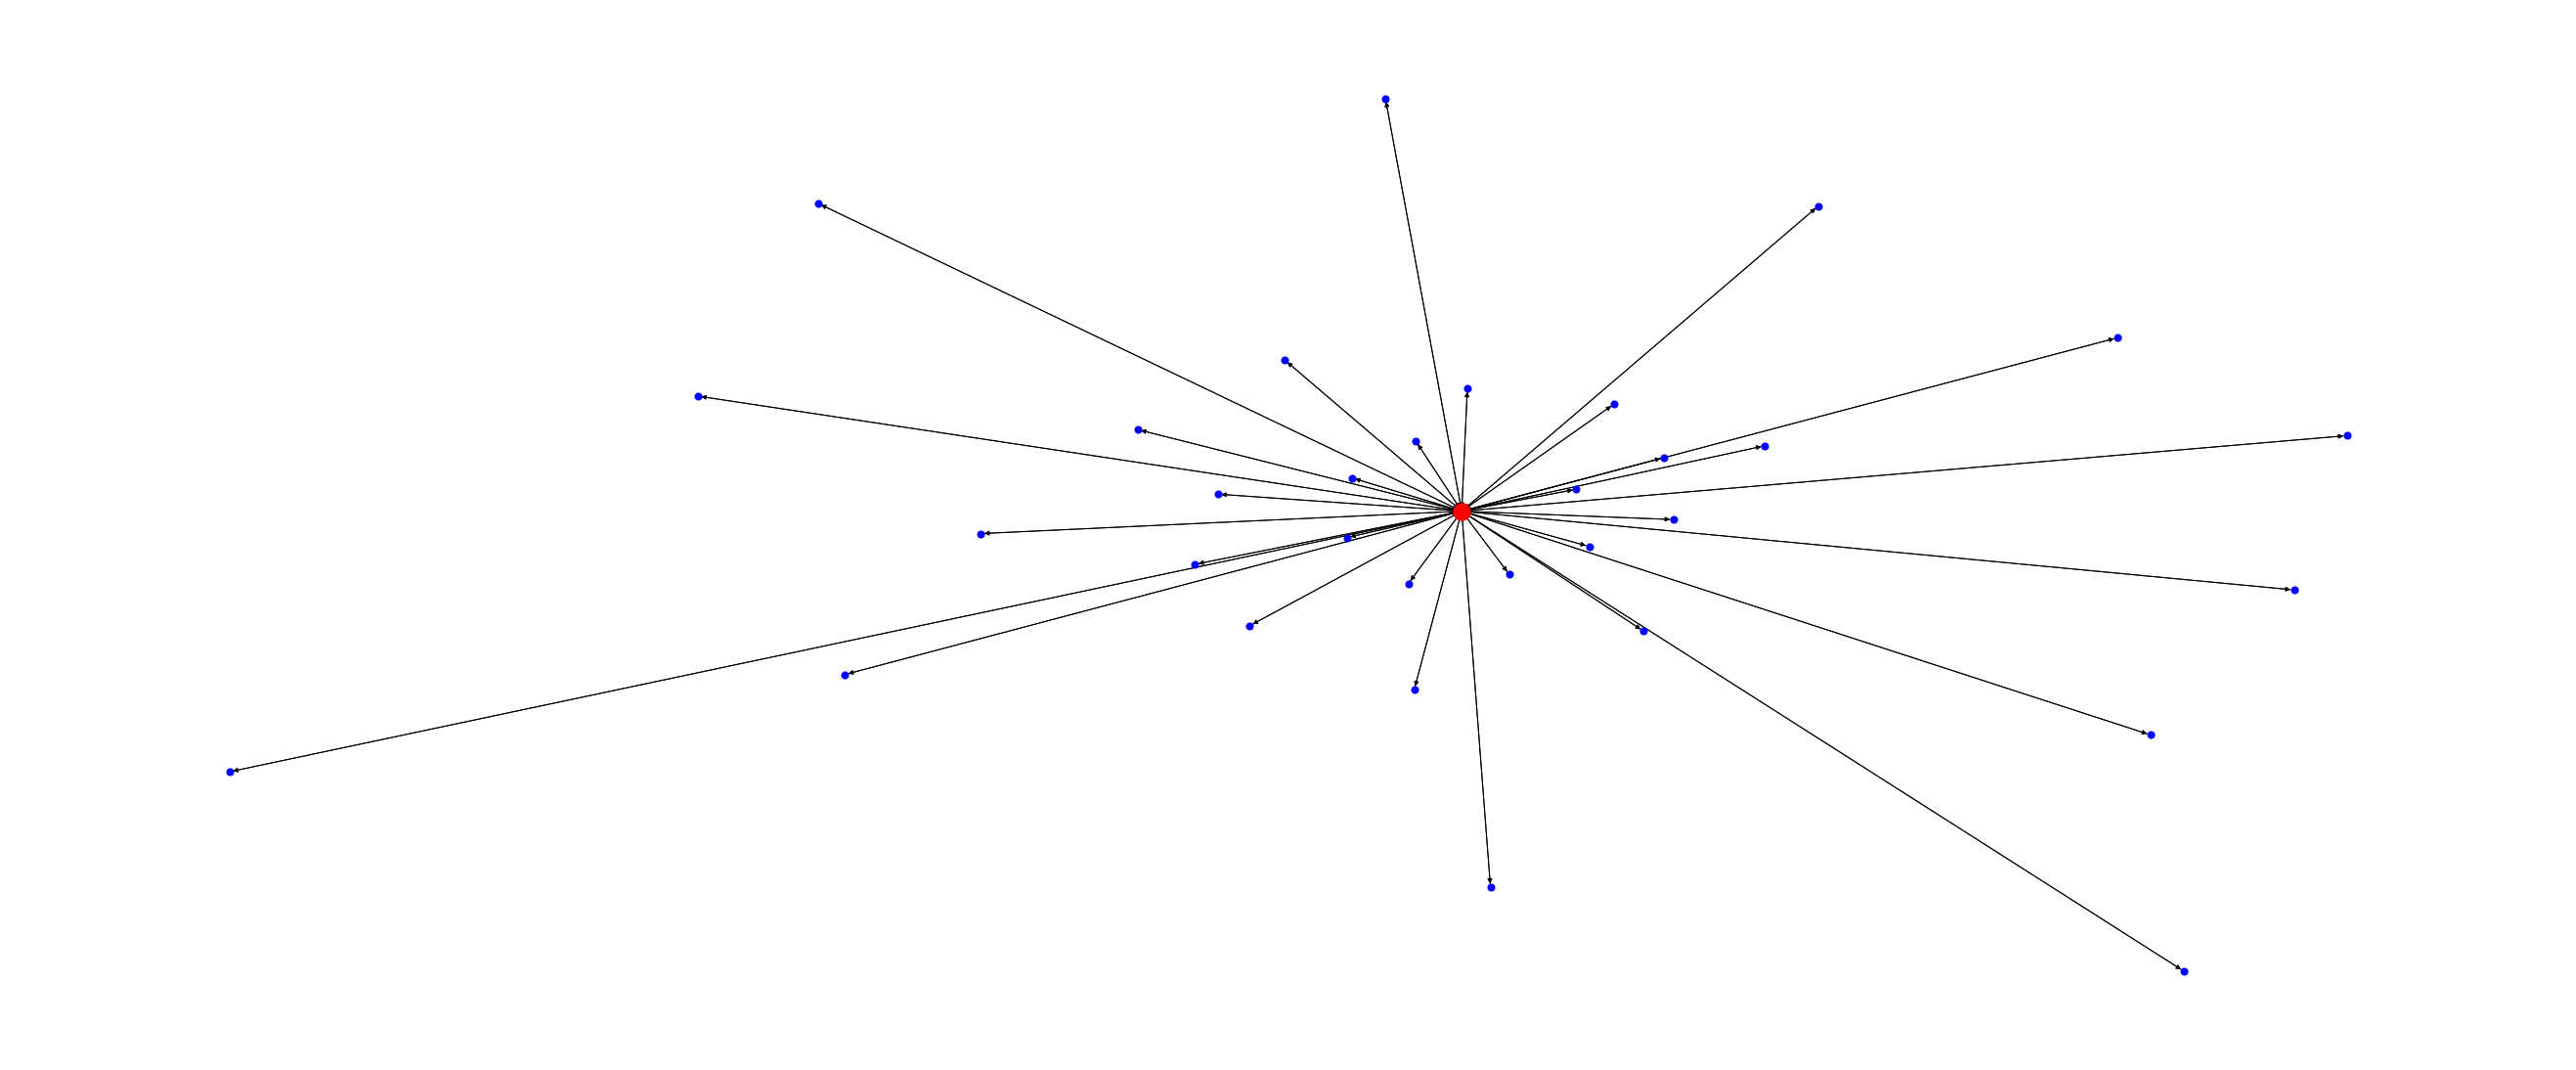

In [123]:
node_and_degree = G0.out_degree(weight= 'weight')
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
print(largest_hub)

# Create ego graph of main hub
hub_ego = nx.ego_graph(G0, largest_hub)
hub_ego.remove_edges_from(nx.selfloop_edges(hub_ego))
stripped_list = [edge for edge in hub_ego.edges() if edge[0] != largest_hub and edge[1] != largest_hub ]
hub_ego.remove_edges_from(stripped_list)



# Draw graph
pos = nx.spring_layout(hub_ego, seed=3110)  # Seed layout for reproducibility
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

In [124]:
nx.write_gexf(hub_ego, "dump.gexf")